# Credit Card customers
## Predict Churning customers

#### Background: 
- A manager at the bank is disturbed with more and more customers leaving their credit card services. They would really appreciate if one could predict for them who is gonna get churned so they can proactively go to the customer to provide them better services and turn customers' decisions in the opposite direction.

#### Data: 
- This dataset consists of 10,000 customers mentioning their age, salary, marital_status, credit card limit, credit card category, etc. There are nearly 18 features.

- Only 16.07% of customers who have churned. Thus, it's a bit difficult to train our model to predict churning customers.

#### Columns:
- Clientnum
- Attrition_Flag
- Customer_Age
- Gender
- Dependent_count: Number of dependents
- Education_Level:Demographic variable - Educational Qualification of the account holder (example: high school, college graduate, etc.)
- Marital_Status: Demographic variable - Married, Single, Divorced, Unknown
- Income_Category: Demographic variable - Annual Income Category of the account holder (< $40K, $40K - 60K, $60K - $80K, $80K-$120K, > $120K, Unknown)
- Card_Category: Product Variable - Type of Card (Blue, Silver, Gold, Platinum)
- Months_on_book: Period of relationship with bank
- Total_Relationship_Count: Total no. of products held by the customer
- Months_Inactive_12_mon: No. of months inactive in the last 12 months
- Contacts_Count_12_mon: No. of Contacts in the last 12 months
- Credit_Limit: Credit Limit on the Credit Card
- Total_Revolving_Bal: Total Revolving Balance on the Credit Card
- Avg_Open_To_Buy: Open to Buy Credit Line (Average of last 12 months)
- Total_Amt_Chng_Q4_Q1: Change in Transaction Amount (Q4 over Q1)
- Total_Trans_Amt:Total Transaction Amount (Last 12 months)
- Total_Trans_Ct:Total Transaction Count (Last 12 months)
- Total_Ct_Chng_Q4_Q1 :Change in Transaction Count (Q4 over Q1)

- Avg_Utilization_Ratio: Average Card Utilization Ratio

- Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1
- Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2

In [341]:
# import the tools for data analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pprint as pp
sns.set_style('darkgrid')
sns.set_palette('Dark2')

# import the csv
df = pd.read_csv('../input/credit-card-customers/BankChurners.csv')

In [343]:
# check for missing data
df.isnull().sum()

CLIENTNUM                                                                                                                             0
Attrition_Flag                                                                                                                        0
Customer_Age                                                                                                                          0
Gender                                                                                                                                0
Dependent_count                                                                                                                       0
Education_Level                                                                                                                       0
Marital_Status                                                                                                                        0
Income_Category                                 

In [344]:
df.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894,0.159997,0.840003
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691,0.365301,0.365301
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000,0.000008,0.000420
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000,0.000099,0.999660
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000,0.000181,0.999820
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000,0.000337,0.999900
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000,0.999580,0.999990


In [345]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

# Data EDA

In [346]:
# Lets drop some unused columns
df.drop(['CLIENTNUM',
         'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
         'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
        axis=1,
        inplace=True
       )

# Map our target feature to 1 or 0
df.Attrition_Flag = df.Attrition_Flag.map({'Existing Customer':0, 'Attrited Customer':1})
df.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,0,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,0,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,0,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,0,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,0,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


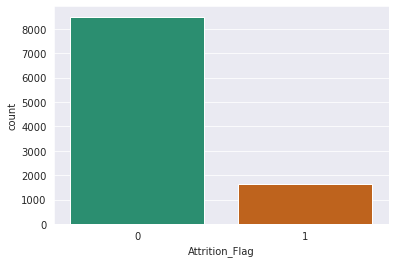

In [347]:
sns.countplot(df.Attrition_Flag)
plt.show()

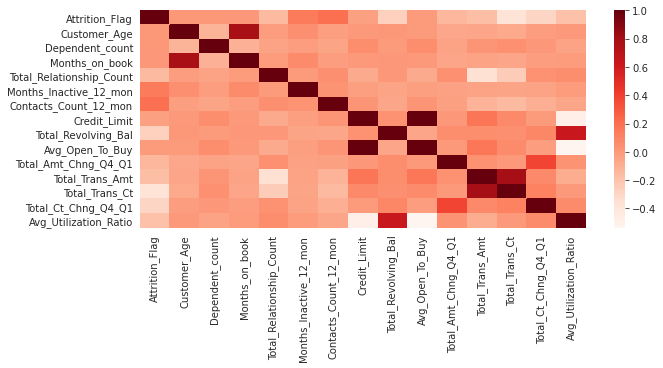

In [348]:
# Show the heatmap of correlation between targat column and other numeric features,
plt.figure(figsize=(10,4))
sns.heatmap(df.corr(),cmap='Reds')

From the heatmap above it is found that no numeric feature have strong negative or positive correlation with the target column. But it is ok I will explore it one by one.

I will start with categorical columns first.

Questions
    1. Is male or female has high chance to become Attrited customer than other?
    2. What is the distribution of education level of those attrited customer ?
    3. Is matrial status an important factor? Alone > married?
    4. Is high income customer has higher chance to leave than low income customer?
    5. Which category of card has the highest number of attrited customer?

In [349]:
print(df.select_dtypes(exclude=['int64','float64']).columns)
figsize = (7,3)

Index(['Gender', 'Education_Level', 'Marital_Status', 'Income_Category',
       'Card_Category'],
      dtype='object')


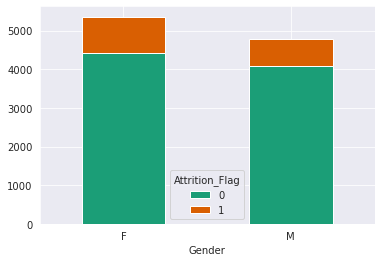

In [350]:
#1. Gender
ax = pd.crosstab(df.Gender, df['Attrition_Flag']).plot.bar(stacked=True)
plt.xticks(rotation=None)
plt.show()

- It seems there is no huge difference between male and female

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text major ticklabel objects>)

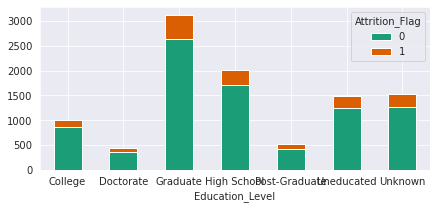

In [351]:
# 2, Education level
pd.crosstab(df['Education_Level'], df['Attrition_Flag']).plot.bar(stacked=True,figsize=figsize)
plt.xticks(rotation=None)

- Many Affrated customers are graudated, but it might beacause of most of the customer in dataset are graduated. So , no obviious relationship found.

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

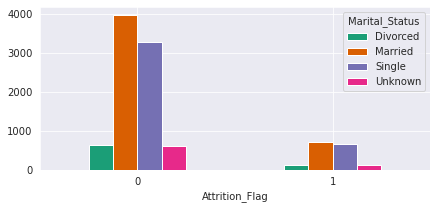

In [352]:
# 3, Matrial status
pd.crosstab(df['Attrition_Flag'],df['Marital_Status']).plot.bar(stacked=False,figsize=figsize)
plt.xticks(rotation=None)

- The number of married and single are very similar, same as education level, no obvious relatioship found.

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

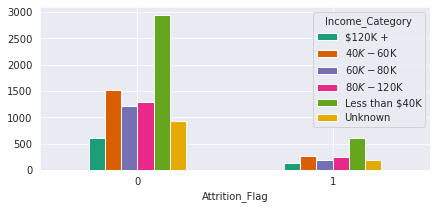

In [353]:
#4. Income_Category
pd.crosstab(df['Attrition_Flag'],df['Income_Category']).plot.bar(stacked=False,figsize=figsize)
plt.xticks(rotation=None)

(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

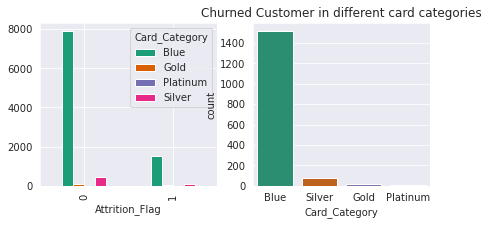

In [354]:
#5. Card_Category
fig, (ax1,ax2) = plt.subplots(1,2,figsize=figsize)
pd.crosstab(df['Attrition_Flag'],df['Card_Category'] ).plot.bar(stacked=False, ax=ax1)
sns.countplot(df[df.Attrition_Flag == 1]['Card_Category'],ax=ax2)
ax2.set_title('Churned Customer in different card categories')
plt.xticks(rotation=None)

Most of the churned customer are in Blue card category. Now we go to explore the numeric features

In [355]:
print(df.select_dtypes(exclude=['object']).columns)

Index(['Attrition_Flag', 'Customer_Age', 'Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')


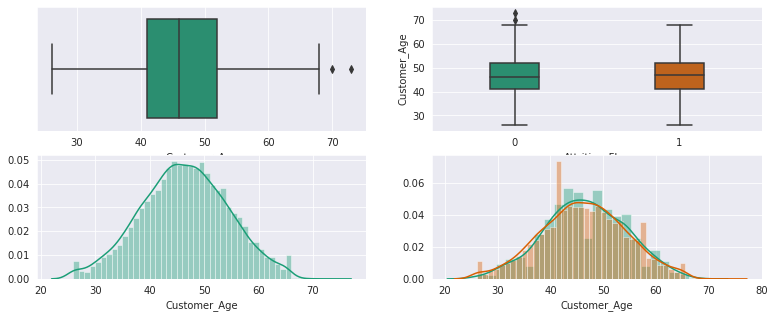

In [356]:
# 1. Age
"""
Are churned customers older than the other customer in average?
"""
fig, [[ax1,ax3],[ax2,ax4]] = plt.subplots(2,2,figsize=(13,5))
sns.boxplot(df.Customer_Age,ax=ax1)
sns.distplot(df.Customer_Age,ax=ax2)
sns.boxplot(x=df.Attrition_Flag,y=df.Customer_Age,ax=ax3, width=0.3)
sns.distplot(df[df.Attrition_Flag==1]['Customer_Age'],ax=ax4)
sns.distplot(df[df.Attrition_Flag==0]['Customer_Age'],ax=ax4)
plt.show()

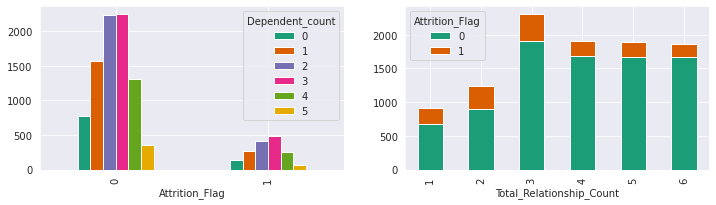

In [357]:
# 2. Dependent count, Total relationship
"""
1. Are the churned customers have lesser dependents?
2. Are the churned customers holding lesser product?
"""
fig, (ax1,ax2) = plt.subplots(1,2 ,figsize=(12,3))
pd.crosstab(df.Attrition_Flag,df.Dependent_count).plot.bar(ax=ax1)
pd.crosstab(df.Total_Relationship_Count, df.Attrition_Flag).plot.bar(stacked=True,ax=ax2)
plt.show()

- The ratio of churned customer is a little bit higher in the group with lesser holding products.

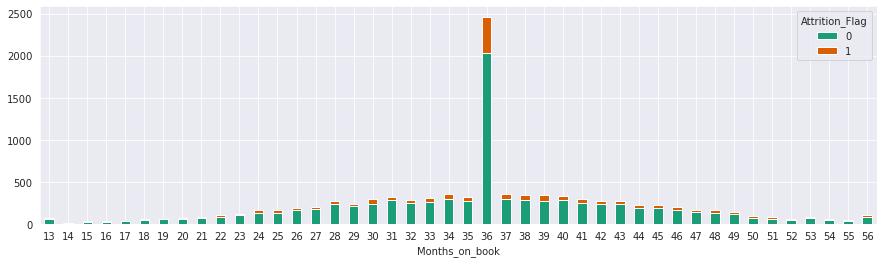

In [358]:
pd.crosstab(df.Months_on_book, df.Attrition_Flag).plot.bar(stacked=True,figsize=(15,4))
plt.xticks(rotation=None)
plt.show()

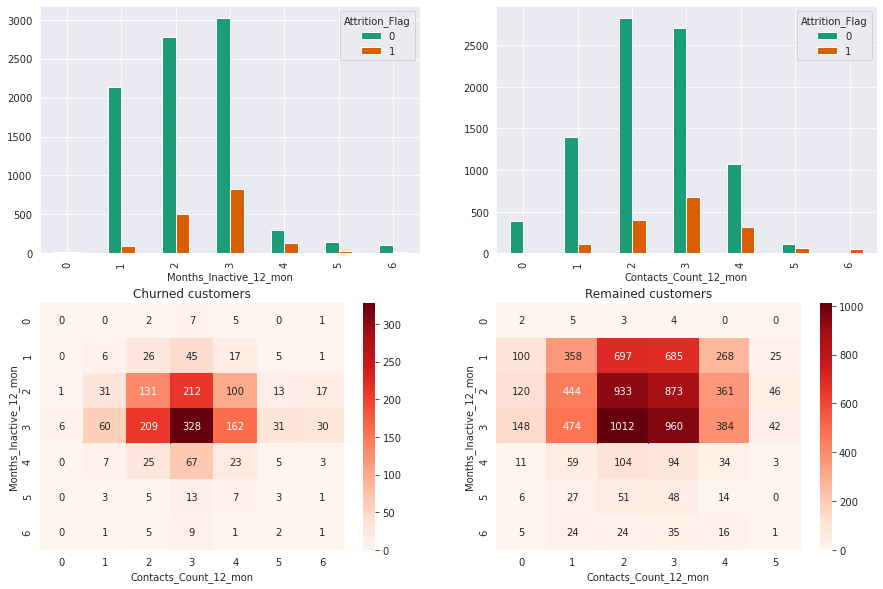

In [359]:
#3. Months_Inactive_12_mon, Contacts_Count_12_mon
fig, ([ax1,ax2],[ax3,ax4]) = plt.subplots(2,2 ,figsize=(15,10))
pd.crosstab(df.Months_Inactive_12_mon,df.Attrition_Flag).plot.bar(ax=ax1)
pd.crosstab(df.Contacts_Count_12_mon,df.Attrition_Flag).plot.bar(ax=ax2)
sns.heatmap(pd.crosstab(df[df.Attrition_Flag==1]['Months_Inactive_12_mon'],df[df.Attrition_Flag==1]['Contacts_Count_12_mon']),fmt='g',cmap='Reds',annot=True,ax=ax3)
sns.heatmap(pd.crosstab(df[df.Attrition_Flag==0]['Months_Inactive_12_mon'],df[df.Attrition_Flag==0]['Contacts_Count_12_mon']),fmt='g',cmap='Reds',annot=True,ax=ax4)
ax3.set_title('Churned customers')
ax4.set_title('Remained customers')
plt.show()

- From the heatmap, it is found that the churned customer are concentrate in the middle (with medium inactive months and medium number of contacts in last 12 month)

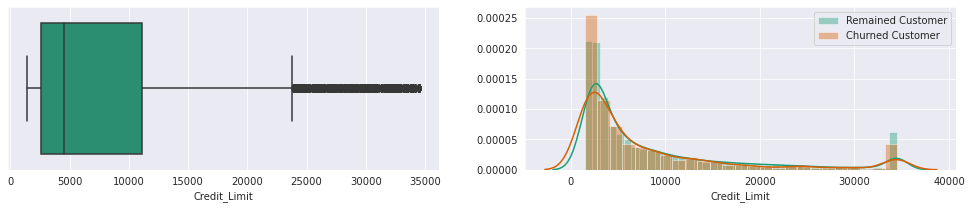

In [360]:
# 4. Creadit limit
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(17,3))
sns.boxplot(df.Credit_Limit,ax=ax1)
sns.distplot(df[df.Attrition_Flag==0]['Credit_Limit'])
sns.distplot(df[df.Attrition_Flag==1]['Credit_Limit'])
ax2.legend(['Remained Customer','Churned Customer'])

- No big difference on credit limit between two groups, but there are many outliers in this feature, which might affect the model performance, I will decide whether to filer out some of the data later.

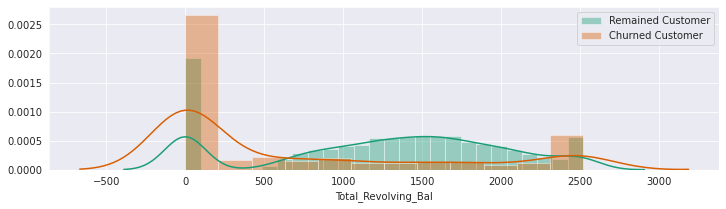

In [361]:
# 5. Total_Revolving_Bal

plt.figure(figsize=(12,3))
sns.distplot(df[df.Attrition_Flag==0]['Total_Revolving_Bal'])
sns.distplot(df[df.Attrition_Flag==1]['Total_Revolving_Bal'])
plt.legend(['Remained Customer','Churned Customer'])
plt.show()

- The distribution of Churned customer and Remainder customer are quite different, most of the churned card holders are with low revolving balance, while a little of them have a extreme high balance (outliers). It is a question to whether filter it out or not, because they might be meaningful when combining with other features.

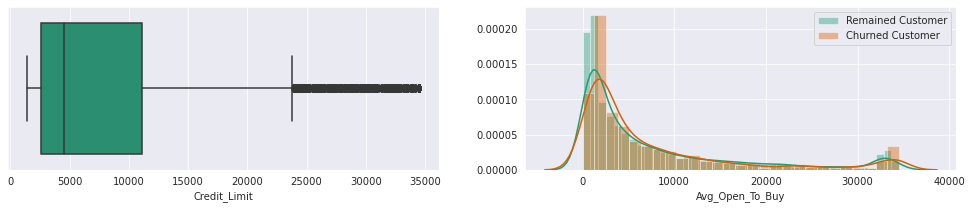

In [362]:
# 6. Avg_Open_To_Buy
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(17,3))
sns.boxplot(df.Credit_Limit,ax=ax1)
sns.distplot(df[df.Attrition_Flag==0]['Avg_Open_To_Buy'])
sns.distplot(df[df.Attrition_Flag==1]['Avg_Open_To_Buy'])
ax2.legend(['Remained Customer','Churned Customer'])

- Similar to credit limit, No big difference between two groups, but many outliers in this feature.

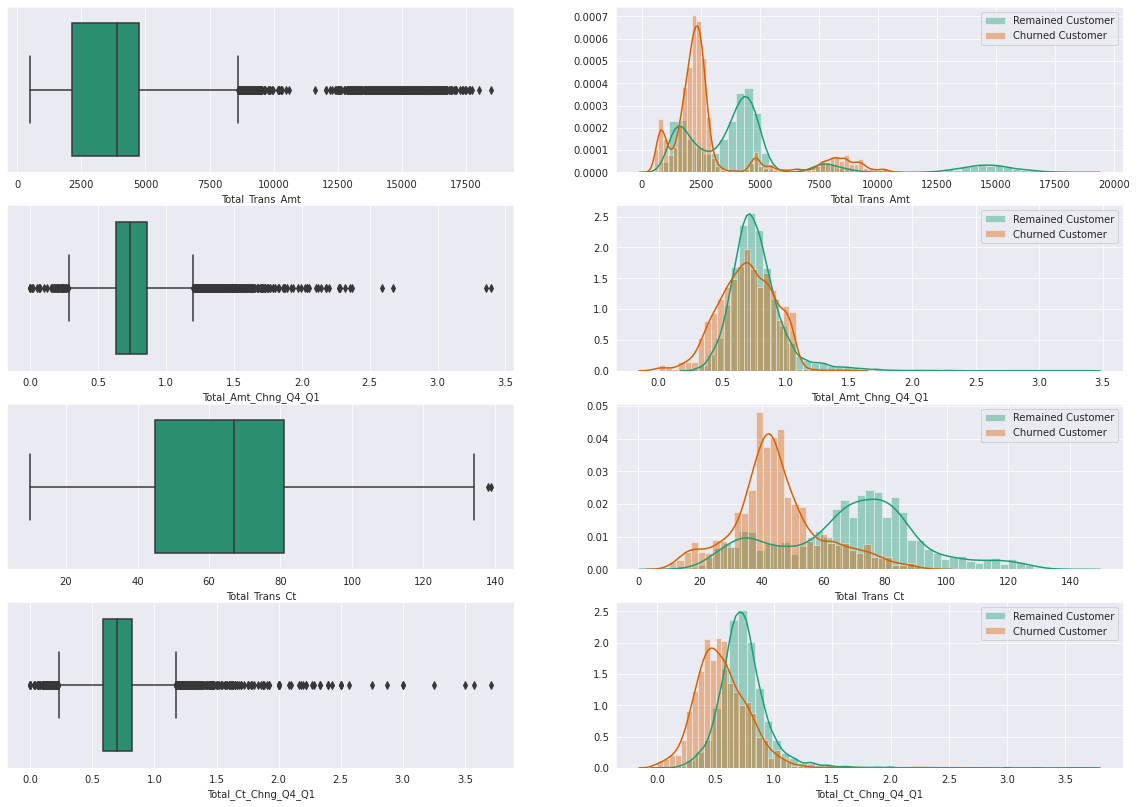

In [363]:
# 7.  'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt','Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1'
"""
It is expected that the number of transaction and amounts of churning customer will be lower than other customers.
"""
fig,([ax1,ax2],[ax3,ax4],[ax5,ax6],[ax7,ax8]) = plt.subplots(4,2,figsize=(20,14))

sns.boxplot(df.Total_Trans_Amt,ax=ax1)
sns.distplot(df[df.Attrition_Flag==0]['Total_Trans_Amt'],ax=ax2)
sns.distplot(df[df.Attrition_Flag==1]['Total_Trans_Amt'],ax=ax2)
ax2.legend(['Remained Customer','Churned Customer'])

sns.boxplot(df.Total_Amt_Chng_Q4_Q1,ax=ax3)
sns.distplot(df[df.Attrition_Flag==0]['Total_Amt_Chng_Q4_Q1'],ax=ax4)
sns.distplot(df[df.Attrition_Flag==1]['Total_Amt_Chng_Q4_Q1'],ax=ax4)
ax4.legend(['Remained Customer','Churned Customer'])

sns.boxplot(df.Total_Trans_Ct,ax=ax5)
sns.distplot(df[df.Attrition_Flag==0]['Total_Trans_Ct'],ax=ax6)
sns.distplot(df[df.Attrition_Flag==1]['Total_Trans_Ct'],ax=ax6)
ax6.legend(['Remained Customer','Churned Customer'])

sns.boxplot(df.Total_Ct_Chng_Q4_Q1,ax=ax7)
sns.distplot(df[df.Attrition_Flag==0]['Total_Ct_Chng_Q4_Q1'],ax=ax8)
sns.distplot(df[df.Attrition_Flag==1]['Total_Ct_Chng_Q4_Q1'],ax=ax8)
ax8.legend(['Remained Customer','Churned Customer'])

plt.show()

- As I expected, both number of transactions and amount of churned customers are lower than others obviously.

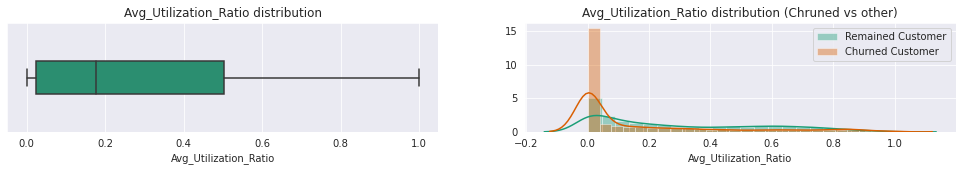

In [364]:
#8. Avg_Utilization_Ratio
fig,([ax1,ax2]) = plt.subplots(1,2,figsize=(17,2))
sns.boxplot(df.Avg_Utilization_Ratio,ax=ax1,width=0.3)
sns.distplot(df[df.Attrition_Flag==0]['Avg_Utilization_Ratio'],ax=ax2)
sns.distplot(df[df.Attrition_Flag==1]['Avg_Utilization_Ratio'],ax=ax2)
ax2.legend(['Remained Customer','Churned Customer'])
ax1.set_title('Avg_Utilization_Ratio distribution')
ax2.set_title('Avg_Utilization_Ratio distribution (Chruned vs other)')
plt.show()

# Data formatting
- Now it's time to format all the data before fitting the model.

In [365]:
# Store the numeric columns into a list
numeric_cols = df.select_dtypes(exclude=['object']).columns.tolist()

### Label encoding
- Since I will use tree-based model for training, one-hot encoding is not necessary.

In [366]:
# Gender
df.Gender = df.Gender.map({'M':1,'F':0})
# Education_level
df.Education_Level = df.Education_Level.map({'Unknown':0,
                       'Uneducated':1,
                       'High School':2,
                       'Graduate':3,
                       'College':4,
                       'Post-Graduate':5,
                       'Doctorate':6})
# Marital status
df.Marital_Status = df.Marital_Status.map({'Unknown':0,
                      'Single':1,
                      'Married':2,
                      'Divorced':3})
# Income Category
df.Income_Category = df.Income_Category.map({'Unknown':0,
                       'Less than $40K':1,
                       '$40K - $60K':2,
                       '$60K - $80K':3,
                       '$80K - $120K':4,
                       '$120K +':5})
# Card category
df.Card_Category = df.Card_Category.map({'Blue':0,
                                        'Silver':1,
                                        'Gold':2,
                                        'Platinum':3})

In [367]:
df.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,0,45,1,3,2,2,3,0,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,0,49,0,5,3,1,1,0,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,0,51,1,3,3,2,4,0,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,0,40,0,4,2,0,1,0,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,0,40,1,3,1,2,3,0,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


## Filter outliers

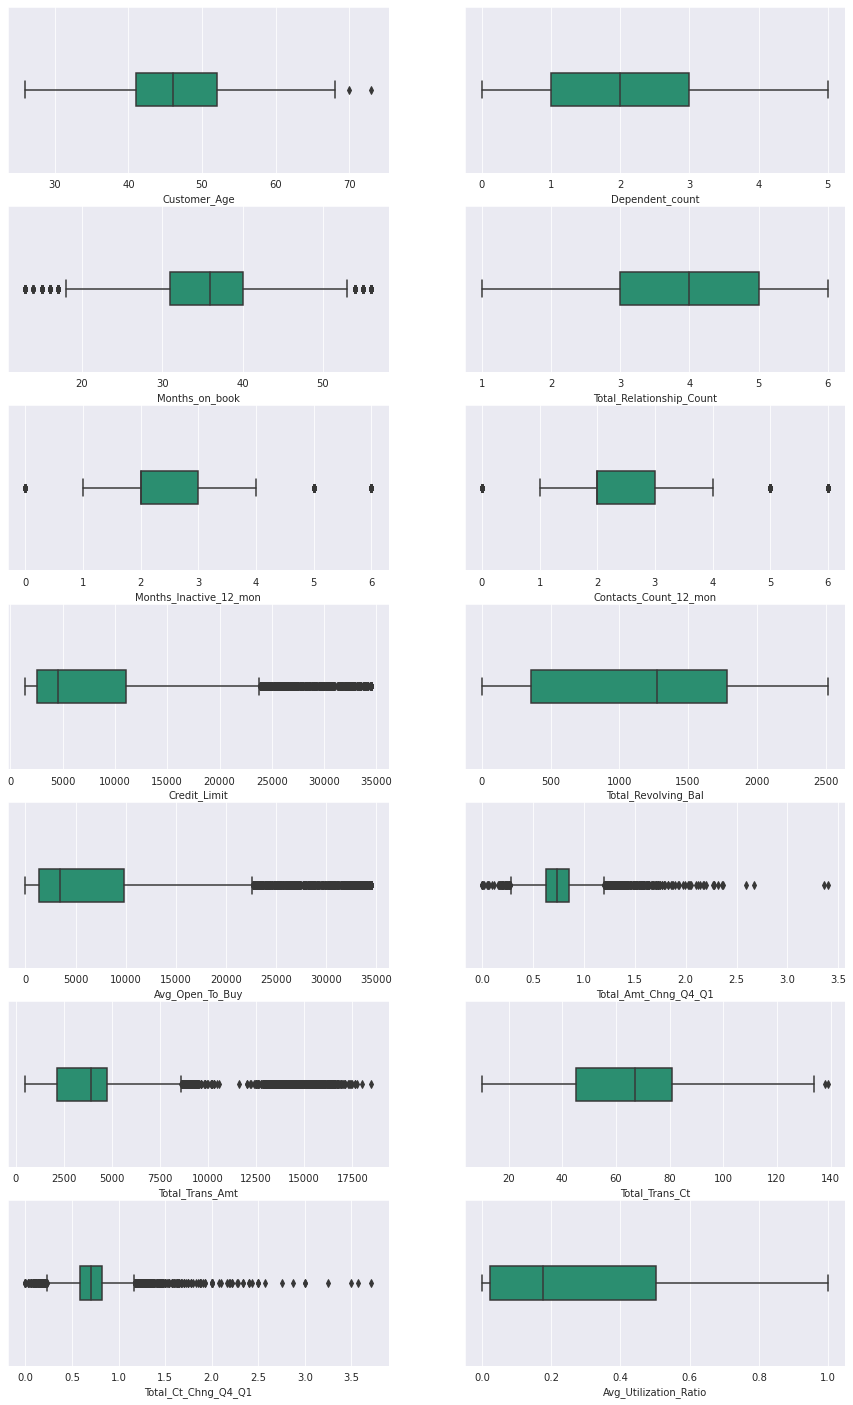

In [406]:
# Show the boxplot of all numeric data
i = 1
plt.figure(figsize=(15,25))
for col in numeric_cols[1:]: # Skip the first column because it is the label (Attrition_Flag)
    plt.subplot(7,2,i)
    sns.boxplot(df[col],width=0.2)
    i+=1
plt.show()

In [443]:
# Fiter out outliers
from scipy.stats import iqr

def filter_outliers(df,col):
    copy_df = df.copy()
    col_iqr = iqr(copy_df[col])
    upper_limit = copy_df[col].quantile(0.75) + 1.5 * col_iqr
    lower_limit = copy_df[col].quantile(0.25) - 1.5 * col_iqr
    #num_rows =  copy_df[(copy_df[col]>upper_limit) | (copy_df[col]<lower_limit)].shape[0]
    copy_df = copy_df[(copy_df[col]<=upper_limit) & (copy_df[col]>=lower_limit)]
    return copy_df

# Since I don't want to drop to much data, I just drop the outliers of these three columns after testing.
df2 = filter_outliers(df,'Total_Trans_Amt')
df2= filter_outliers(df2,'Credit_Limit')
df2= filter_outliers(df2,'Avg_Open_To_Buy')

## Dateset prepration
- Split the dataframe into x(features) and y(label)
- Standardize all the features
- Split into training set and test set, Take 20% data for test set.

In [452]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

x , y = df2.drop('Attrition_Flag',axis=1),df2['Attrition_Flag']
x = StandardScaler().fit_transform(x)

x_train,x_test, y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=1)

# Start Training model

- We will train a baseline model without oversampling / undersampling first , then see what can we do to improve the performance

In [488]:
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold,cross_validate
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.pipeline import Pipeline

# Tools for oversampling and undersampling
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    6.6s finished


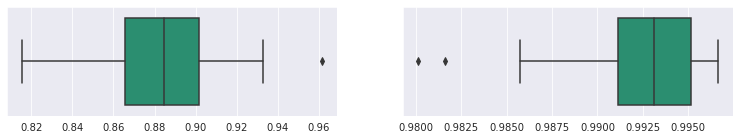

In [479]:
model = LGBMClassifier()
kfold = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=2)
cv = cross_validate(model,x_train,y_train,cv=kfold,n_jobs=-1,scoring=['recall','roc_auc'],verbose=1)
plt.figure(figsize=(13,2))
plt.subplot(1,2,1)
sns.boxplot(cv['test_recall'])
plt.subplot(1,2,2)
sns.boxplot(cv['test_roc_auc'])
plt.show()

- The recall score is not bad, Now lets tune the hyperparameters of the model.

In [481]:
params = {
    'n_estimators':[50,100,200,500],
    'max_depth':[3,6,9],
    'learning_rate':[0.0001,0.001,0.01,0.1],
    'boosting_type':['gbdt','goss','dart'],
    'sub_sample':[0.3,0.5,0.7,1],
    'colsample_bytree':[0.3,0.5,0.7,1],
}
kfold = RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=2)
model = LGBMClassifier(random_state=2)
grid_model = GridSearchCV(model,params,cv=kfold,n_jobs=-1,verbose=1,scoring='recall')
grid_model.fit(x_train,y_train)

Fitting 10 folds for each of 2304 candidates, totalling 23040 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  44 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 324 tasks      | elapsed:   30.9s
[Parallel(n_jobs=-1)]: Done 636 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 1116 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 1638 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 2248 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 3000 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-1)]: Done 3828 tasks      | elapsed:  7.4min
[Parallel(n_jobs=-1)]: Done 4678 tasks      | elapsed:  9.3min
[Parallel(n_jobs=-1)]: Done 5628 tasks      | elapsed: 11.7min
[Parallel(n_jobs=-1)]: Done 6678 tasks      | elapsed: 14.7min
[Parallel(n_jobs=-1)]: Done 7880 tasks      | elapsed: 18.2min
[Parallel(n_jobs=-1)]: Done 9130 tasks      | elapsed: 21.0min
[Parallel(n_jobs=-1)]: Done 10480 tasks      | elapsed: 24.0min
[Parallel(n_jobs=-1)]: Done 11930 tasks     

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=2, n_splits=5, random_state=2),
             estimator=LGBMClassifier(random_state=2), n_jobs=-1,
             param_grid={'boosting_type': ['gbdt', 'goss', 'dart'],
                         'colsample_bytree': [0.3, 0.5, 0.7, 1],
                         'learning_rate': [0.0001, 0.001, 0.01, 0.1],
                         'max_depth': [3, 6, 9],
                         'n_estimators': [50, 100, 200, 500],
                         'sub_sample': [0.3, 0.5, 0.7, 1]},
             verbose=1)

- After two hours.....

### Evaluation on Base model
- Classification report and confusion matrix would be enough to see the performance

In [485]:
y_pred = grid_model.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1287
           1       0.92      0.89      0.91       270

    accuracy                           0.97      1557
   macro avg       0.95      0.94      0.94      1557
weighted avg       0.97      0.97      0.97      1557



- The model is doing quite well, both preicision and recall score are very close ~90. 

Text(33.0, 0.5, 'True')

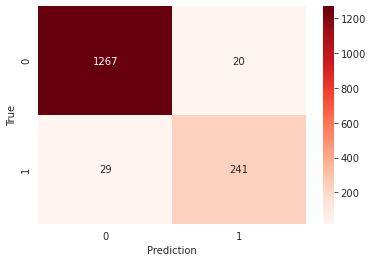

In [495]:
sns.heatmap(confusion_matrix(y_test,y_pred),cmap='Reds',annot=True,fmt='d')
plt.xlabel('Prediction')
plt.ylabel('True')

- The number of false negative and false positive are very close, the balance of the base model is quite well!

# Modify data using Oversampling (SMOTE)
- I will use SMOTE for data oversampling and see whether the model will be improved or not

In [511]:
smote = BorderlineSMOTE()
x_smote, y_smote = smote.fit_resample(x_train,y_train)

In [512]:
# Using the hyperparameters we have trained above
model_smote = LGBMClassifier(boosting_type='goss',
                       colsample_bytree=0.5,
                       learning_rate=0.1,
                       max_depth=6,
                       n_estimators=200,
                       sub_sample= 0.3)
model_smote.fit(x_smote, y_smote)

LGBMClassifier(boosting_type='goss', colsample_bytree=0.5, max_depth=6,
               n_estimators=200, sub_sample=0.3)

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1287
           1       0.89      0.91      0.90       270

    accuracy                           0.97      1557
   macro avg       0.94      0.94      0.94      1557
weighted avg       0.97      0.97      0.97      1557



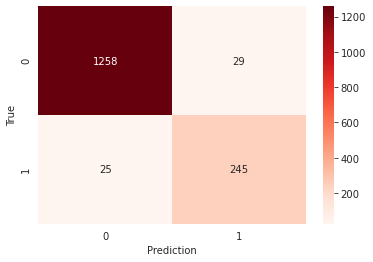

In [514]:
y_pred = model_smote.predict(x_test)
print(classification_report(y_test,y_pred))
sns.heatmap(confusion_matrix(y_test,y_pred),cmap='Reds',annot=True,fmt='d')
plt.xlabel('Prediction')
plt.ylabel('True')
plt.show()

- The recall score is a little bit higher than before while at the same time the precision is down
- Let see what will happen if I use both oversampling and undersampling to the data.

# Modify data using Oversampling and Undersampling (SMOTE)

In [515]:
smote = BorderlineSMOTE(sampling_strategy=0.5)
under = RandomUnderSampler()

pipe = Pipeline(steps=[('smote',smote),
                      ('under',under)])
x_smote, y_smote = pipe.fit_resample(x_train,y_train)

In [516]:
model_ou = LGBMClassifier(boosting_type='goss',
                       colsample_bytree=0.5,
                       learning_rate=0.1,
                       max_depth=6,
                       n_estimators=200,
                       sub_sample= 0.3)
model_ou.fit(x_smote, y_smote)

LGBMClassifier(boosting_type='goss', colsample_bytree=0.5, max_depth=6,
               n_estimators=200, sub_sample=0.3)

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1287
           1       0.87      0.94      0.90       270

    accuracy                           0.97      1557
   macro avg       0.93      0.96      0.94      1557
weighted avg       0.97      0.97      0.97      1557



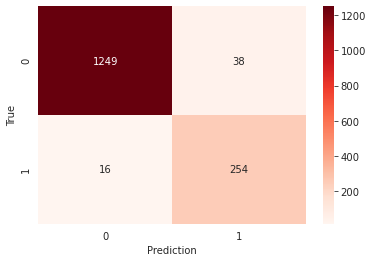

In [518]:
y_pred = model_ou.predict(x_test)
print(classification_report(y_test,y_pred))
sns.heatmap(confusion_matrix(y_test,y_pred),cmap='Reds',annot=True,fmt='d')
plt.xlabel('Prediction')
plt.ylabel('True')
plt.show()

- The recall is much more high than before, as a cost, the precision become lower, so it is a trade-off between recall and precision score. 

# Thank you very much